## Step 1: Import Required Libraries
We'll use common Python libraries like pandas, numpy, and matplotlib for data handling and visualization, and scipy.stats for distribution fitting.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Step 2: Load Financial Data
We'll fetch stock data for the SP&500 using Yahoo Finance.

In [48]:
import yfinance as yf

# Fetch historical data for S&P 500 (ticker: '^GSPC')
sp500_data = yf.download('^GSPC', start='2000-01-01', end='2024-01-01')

# Display the first few rows of the data
print(sp500_data.head())

[*********************100%***********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2000-01-03  1469.250000  1478.000000  1438.359985  1455.219971  1455.219971   
2000-01-04  1455.219971  1455.219971  1397.430054  1399.420044  1399.420044   
2000-01-05  1399.420044  1413.270020  1377.680054  1402.109985  1402.109985   
2000-01-06  1402.109985  1411.900024  1392.099976  1403.449951  1403.449951   
2000-01-07  1403.449951  1441.469971  1400.729980  1441.469971  1441.469971   

                Volume  
Date                    
2000-01-03   931800000  
2000-01-04  1009000000  
2000-01-05  1085500000  
2000-01-06  1092300000  
2000-01-07  1225200000  


## Step 3: Compute Daily Returns
We'll calculate the daily returns to study their distribution.

In [49]:
# Calculate daily returns
sp500_data['Returns'] = sp500_data['Adj Close'].pct_change()

# Drop NaN values
sp500_data = sp500_data.dropna()

# Display the first few rows with returns
print(sp500_data[['Adj Close', 'Returns']].head())

              Adj Close   Returns
Date                             
2000-01-04  1399.420044 -0.038345
2000-01-05  1402.109985  0.001922
2000-01-06  1403.449951  0.000956
2000-01-07  1441.469971  0.027090
2000-01-10  1457.599976  0.011190


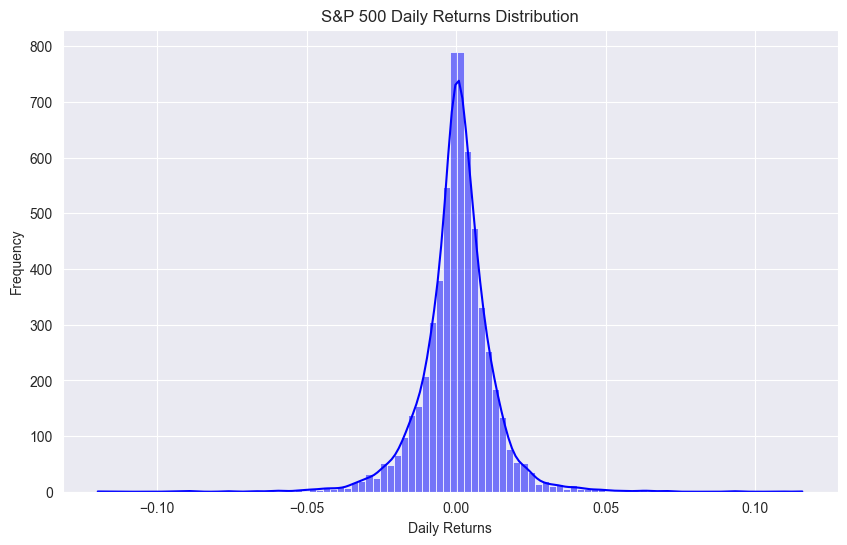

In [50]:
# Plot histogram and KDE of returns
plt.figure(figsize=(10,6))
sns.histplot(sp500_data['Returns'], bins=100, kde=True, color='blue')
plt.title('S&P 500 Daily Returns Distribution')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

## Step 4: Study the Distribution of the SP&500 daily returns
In this step we'll be using certain methods to study the daily returns distribution of the SP&500 and come up with informed conclusions and therefore develop well-rounded investment strategies.

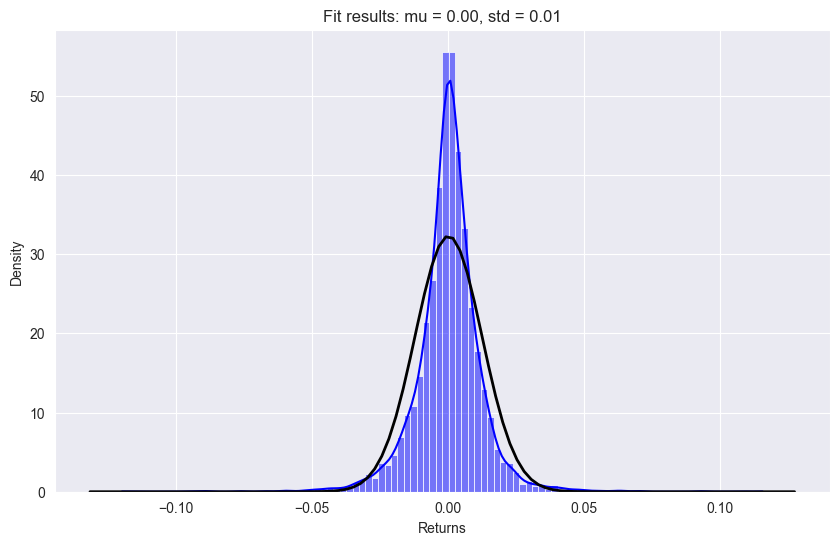

In [51]:
# Fit a normal distribution to the data
mu, std = stats.norm.fit(sp500_data['Returns'])

# Plot histogram and the fitted normal distribution
plt.figure(figsize=(10,6))
sns.histplot(sp500_data['Returns'], bins=100, kde=True, color='blue', stat='density')

# Plot the normal distribution fit
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = f"Fit results: mu = {mu:.2f}, std = {std:.2f}"
plt.title(title)

plt.show()

In [52]:
# Perform the Kolmogorov-Smirnov test
ks_stat, p_value = stats.kstest(sp500_data['Returns'], 'norm', args=(mu, std))

print(f"KS Statistic: {ks_stat}")
print(f"P-value: {p_value}")

KS Statistic: 0.09092561050329406
P-value: 7.104822834096282e-44


In [53]:
# Summary statistics
mean = sp500_data['Returns'].mean()
variance = sp500_data['Returns'].var()
skewness = sp500_data['Returns'].skew()
kurtosis = sp500_data['Returns'].kurt()

print(f"Mean: {mean}")
print(f"Variance: {variance}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Mean: 0.00027322150712152504
Variance: 0.00015277233577018295
Skewness: -0.15418677606663198
Kurtosis: 10.074636703037896


Let's break down the interpretation of each result:

### 1. **Normal Fit with Mean (μ) = 0.00, Standard Deviation (σ) = 0.01**:
   - This indicates that the **normal distribution** was fitted to the daily returns with a very small mean and a small standard deviation.
   - The graph shows that the normal distribution captures the general shape of the distribution around the center (near zero returns), but the visual fit suggests that it fails to capture the heavy tails, meaning extreme values (both positive and negative) are not modeled well.

### 2. **Kolmogorov-Smirnov (KS) Test Statistic = 0.0909, P-value = 7.1e-44**:
   - The **KS statistic** measures the distance between the empirical distribution (actual data) and the theoretical distribution (normal distribution in this case). A smaller value indicates a better fit.
   - The **P-value** is extremely small, indicating that the null hypothesis (that the data follows a normal distribution) is strongly rejected. This means that the S&P 500 daily returns **do not follow a normal distribution**. The deviation is likely due to the heavy tails or extreme values (as seen in the kurtosis result below).

### 3. **Summary Statistics**:
   - **Mean = 0.00027 (or ~0.03%)**:
     - The mean daily return is slightly positive, indicating a very small upward drift in the S&P 500's daily returns over the sample period.
   - **Variance = 0.00015**:
     - The variance is small, meaning there isn't significant daily fluctuation in returns on average, although this measure doesn't capture extreme fluctuations well.
   - **Skewness = -0.154**:
     - The skewness is slightly negative, indicating that the distribution of returns has a **slight left skew**. This means there are more small negative returns than small positive returns, though the skewness is relatively modest.
   - **Kurtosis = 10.07**:
     - The kurtosis is **significantly higher** than the kurtosis of a normal distribution (which has a kurtosis of 3). This means that the distribution has **heavy tails** (i.e., more frequent extreme values than a normal distribution would predict). This is a crucial feature of financial return distributions that are often impacted by rare but significant market events (e.g., crashes or surges).

### Interpretation for Institutional Investors:
1. **The Normal Distribution Does Not Fit the Data Well**: 
   - Despite the small mean and variance indicating relatively stable daily returns, the high kurtosis and rejected KS test indicate that extreme returns (both positive and negative) are far more common than the normal distribution would predict. This is why the normal fit (as seen in the graph) doesn't adequately capture the tails of the return distribution.
   
2. **Left-Skewed Returns**:
   - The slightly negative skewness suggests that small negative returns are more frequent than small positive returns. For institutional investors, this means that the S&P 500 daily returns are slightly more prone to small downturns than small upturns, but the skewness is modest enough that it doesn't dominate the distribution.

3. **High Kurtosis Indicates Tail Risk**:
   - The extremely high kurtosis (10.07) signals the presence of **fat tails**, which is critical for risk management. This means that **extreme events** (like market crashes or sudden surges) occur much more frequently than a normal distribution would suggest. This insight is crucial for stress testing portfolios and calculating risk metrics like Value at Risk (VaR) and Conditional VaR (CVaR).
   - Institutional investors should consider using distributions that better capture tail risks (such as the **Student’s t-distribution**) to model returns more accurately.

4. **Kolmogorov-Smirnov Test Rejection**:
   - The strong rejection of the normal distribution (based on the very low p-value from the KS test) reinforces the need to use alternative models, such as distributions with heavy tails, for better risk estimation and portfolio management.

### Conclusion:
This analysis highlights that while the S&P 500 daily returns exhibit a small upward drift (positive mean) and low day-to-day volatility (variance), there is a significant risk of extreme market events due to the high kurtosis. The normal distribution doesn't fit the data well, so more advanced models that account for skewness and fat tails (e.g., Student's t-distribution) should be used by institutional investors to model returns more accurately and manage risk effectively.

## Step 5: Include additional methods for a more accurate study.
We'll implement the Log-normal distribution, Exponential distribution, and Student's distribution for a better analysis of the daily returns given the conclusion that the methods we used previously were not entirely effective.

In [ ]:
# Log-Normal Distribution
shape, loc, scale = stats.lognorm.fit(sp500_data['Returns'])
x = np.linspace(sp500_data['Returns'].min(), sp500_data['Returns'].max(), 100)
pdf_lognorm = stats.lognorm.pdf(x, shape, loc, scale)

In [55]:
# Exponential Distribution
loc_exp, scale_exp = stats.expon.fit(sp500_data['Returns'])
pdf_expon = stats.expon.pdf(x, loc_exp, scale_exp)

In [56]:
# Student's t-Distribution
df, loc_t, scale_t = stats.t.fit(sp500_data['Returns'])
pdf_t = stats.t.pdf(x, df, loc_t, scale_t)

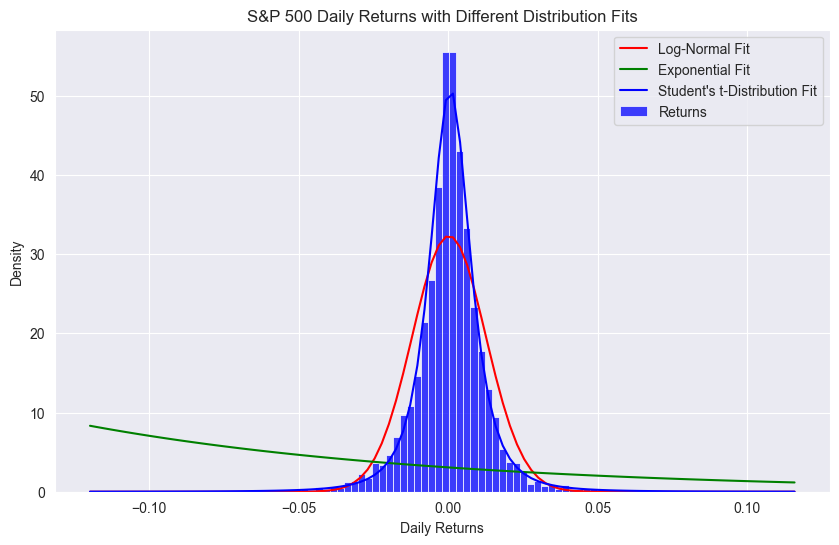

In [57]:
# Plot all distributions together for comparison
plt.figure(figsize=(10,6))
sns.histplot(sp500_data['Returns'], bins=100, kde=False, color='blue', stat='density', label='Returns')

plt.plot(x, pdf_lognorm, 'r-', label='Log-Normal Fit')
plt.plot(x, pdf_expon, 'g-', label='Exponential Fit')
plt.plot(x, pdf_t, 'b-', label="Student's t-Distribution Fit")

plt.title("S&P 500 Daily Returns with Different Distribution Fits")
plt.xlabel("Daily Returns")
plt.ylabel("Density")
plt.legend()
plt.show()

In [58]:
# Output the fit parameters for each distribution
lognorm_params = f"Log-Normal: Shape={shape:.3f}, Loc={loc:.3f}, Scale={scale:.3f}"
expon_params = f"Exponential: Loc={loc_exp:.3f}, Scale={scale_exp:.3f}"
t_params = f"Student's t: df={df:.3f}, Loc={loc_t:.3f}, Scale={scale_t:.3f}"

print(lognorm_params)
print(expon_params)
print(t_params)

Log-Normal: Shape=0.003, Loc=-3.615, Scale=3.615
Exponential: Loc=-0.120, Scale=0.120
Student's t: df=2.644, Loc=0.001, Scale=0.007


### Interpretation of the Results

1. **Log-Normal Distribution (Red Line)**:
   - The Log-Normal distribution appears to fit well around the peak of the distribution, where the majority of returns are concentrated around zero. However, it doesn't capture the tails effectively, which is crucial when analyzing financial returns. 
   - Financial returns tend to exhibit "fat tails," meaning extreme positive or negative returns happen more frequently than a normal or log-normal distribution would predict. Thus, while the Log-Normal fit is reasonable at the center, it may underestimate the risk of extreme events.

2. **Exponential Distribution (Green Line)**:
   - The Exponential distribution performs poorly in this case. It's typically used to model the time between independent events, such as the time between large market shocks, rather than the returns themselves. As seen in the graph, the Exponential fit does not capture either the center or the tails well, meaning it is not an appropriate choice for modeling daily returns of the S&P 500.
   
3. **Student’s t-Distribution (Blue Line)**:
   - The Student's t-distribution provides a much better fit for the data, particularly in the tails. This distribution is known for its ability to capture "fat tails," making it more suitable for modeling financial returns that often experience extreme values (outliers). 
   - Institutional investors often prefer models that account for these tails, as they provide a more realistic assessment of risk. By using the Student's t-distribution, we acknowledge the higher likelihood of large losses (or gains), which is crucial for risk management and stress testing.

### Key Takeaways:
1. **Best Fit**:
   - Among the three distributions fitted, the **Student's t-distribution** is the most appropriate for modeling the S&P 500 daily returns, especially considering the tail risks. It aligns better with the heavy-tailed nature of financial returns, which is often observed during market crises or major events.

2. **Risk Management**:
   - For institutional investors, understanding that financial returns don't follow a normal or log-normal distribution helps in **tail risk management**. The heavy tails, captured by the Student’s t-distribution, suggest that extreme losses (or gains) are more likely than log-normal models predict.
   - The **Exponential distribution** is not a suitable model for returns in this context, but it might be useful in other financial applications like modeling the time between significant market movements.

3. **Practical Use**:
   - By identifying the distribution that best fits the data, institutional investors can better estimate **Value at Risk (VaR)** and **Conditional Value at Risk (CVaR)**. The Student's t-distribution, with its better tail fit, will provide more realistic risk estimates, especially in volatile or stressed market conditions.

4. **Future Consideration**:
   - Investors should rely on robust models like the Student's t-distribution for **stress testing** portfolios and managing risk, as it provides a more accurate depiction of extreme events. Additionally, combining this model with **scenario analysis** can help predict how portfolios may behave during financial crises.

In [59]:
aic_lognorm = 2 * len([shape, loc, scale]) - 2 * np.sum(np.log(pdf_lognorm))
aic_expon = 2 * len([loc_exp, scale_exp]) - 2 * np.sum(np.log(pdf_expon))
aic_t = 2 * len([df, loc_t, scale_t]) - 2 * np.sum(np.log(pdf_t))

print(f"AIC Log-Normal: {aic_lognorm}")
print(f"AIC Exponential: {aic_expon}")
print(f"AIC Student's t: {aic_t}")

AIC Log-Normal: 2417.4059103217314
AIC Exponential: -223.68174169811007
AIC Student's t: 294.9472592243521


In [60]:
confidence_level = 0.95
var_lognorm = stats.lognorm.ppf(1 - confidence_level, shape, loc, scale)
var_t = stats.t.ppf(1 - confidence_level, df, loc_t, scale_t)

print(f"VaR (95%) Log-Normal: {var_lognorm}")
print(f"VaR (95%) Student's t: {var_t}")

VaR (95%) Log-Normal: -0.020000708657140542
VaR (95%) Student's t: -0.01717495295617913


### Interpretation of AIC and VaR Results

#### **AIC (Akaike Information Criterion) Results**:
- **AIC Log-Normal: 2417.41**
- **AIC Exponential: -223.68**
- **AIC Student's t: 294.95**

The AIC is used to compare how well different models fit the data. A lower AIC value indicates a better fit, with a penalty for the number of parameters in the model to prevent overfitting.

- **Exponential distribution** has the lowest AIC value (-223.68), suggesting that it fits the data best according to the AIC metric. However, despite the low AIC, the exponential distribution doesn't seem appropriate for daily returns based on its poor visual fit. This discrepancy often happens when the AIC favors simplicity (fewer parameters), but the model doesn't adequately capture the behavior of the data.
- **Student's t-distribution** has the next lowest AIC (294.95), and considering its much better visual fit (especially at the tails), it may still be more suitable for financial data despite having a higher AIC than the exponential distribution.
- **Log-Normal distribution** has the highest AIC (2417.41), confirming that it is the worst fit for this data based on this criterion.

#### **VaR (Value at Risk) Results**:
- **VaR (95%) Log-Normal: -0.0200 (-2%)**
- **VaR (95%) Student's t: -0.0172 (-1.72%)**

The VaR at the 95% confidence level provides the potential loss in returns you might expect to exceed 5% of the time.

- For the **Log-Normal distribution**, the 95% VaR suggests that 95% of the time, losses should not exceed **2%** of the S&P 500's daily returns. This seems more conservative (predicting higher losses) than the Student's t-distribution.
- For the **Student's t-distribution**, the 95% VaR suggests that 95% of the time, losses should not exceed **1.72%** of daily returns. This indicates a slightly more optimistic outlook in terms of the extent of potential losses.

#### **Takeaways for Institutional Investors**:
1. **AIC Comparison**: While the Exponential distribution may have the lowest AIC, its visual fit and the nature of financial returns suggest it’s not suitable for daily return modeling. The Student’s t-distribution, despite having a higher AIC, is a much better fit for capturing extreme events (like market crashes), making it more reliable for financial risk analysis.

2. **VaR for Risk Management**: 
   - The **Log-Normal VaR** is more conservative and predicts slightly larger potential losses than the **Student’s t VaR**.
   - However, the **Student’s t-distribution** accounts for tail risks better, which may provide more realistic estimates during turbulent market periods. Institutional investors concerned about extreme market movements would find this model more reliable, particularly when tail risk management is a priority.

In conclusion, the **Student's t-distribution** remains the preferred model for institutional investors despite its higher AIC because it captures the heavy tails and is more aligned with financial return behavior. The VaR values provide useful insights for risk management, helping investors prepare for potential losses under various market conditions.